In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator ,img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.utils import plot_model
from keras import Model
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow as tf

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
train_dir = r'E:\Data Science\Projects\DL\Gender Classification\data\Training'
val_dir = r'E:\Data Science\Projects\DL\Gender Classification\data\Validation'

train_dir_male = train_dir + '/male'
train_dir_female = train_dir + '/female'

val_dir_male  = val_dir + '/male'
val_dir_female  = val_dir + '/female'

total_train = len(os.listdir(train_dir_male)) + len(os.listdir(train_dir_female))
total_val = len(os.listdir(val_dir_male)) + len(os.listdir(val_dir_female))

In [5]:
print('number of male training images - ', len(os.listdir(train_dir_male)))
print('number of female training images - ', len(os.listdir(train_dir_female)))
print('----------------------------------------------------------------------')
print('number of male testing  images - ', len(os.listdir(val_dir_male)))
print('number of female testing  images - ', len(os.listdir(val_dir_female)))
print('----------------------------------------------------------------------')
print("Total training images:", total_train)
print("Total validation images:", total_val)

number of male training images -  23764
number of female training images -  23243
----------------------------------------------------------------------
number of male testing  images -  5751
number of female testing  images -  5841
----------------------------------------------------------------------
Total training images: 47007
Total validation images: 11592


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# Flipping the image horizontally

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=64,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(64,64))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# Rotating the image

image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=64,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(64, 64))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# Applying Zoom

image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=64,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(64, 64))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [6]:
image_gen_train = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 45,
                    width_shift_range = .15,
                    height_shift_range = .15,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    zoom_range = 0.5
                    )

image_gen_val = ImageDataGenerator(rescale=1./255)

In [7]:
batch_size = 64

training_data_gen = image_gen_train.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   class_mode ='binary',
                                                   color_mode = "rgb",
                                                   batch_size = batch_size,
                                                   shuffle=True)

validation_data_gen = image_gen_val.flow_from_directory(directory = val_dir,
                                                  target_size = (64, 64),
                                                  class_mode = 'binary',
                                                  color_mode = "rgb",
                                                  batch_size = batch_size)

test_data_gen = image_gen_val.flow_from_directory(directory = val_dir,
                                                  target_size = (64, 64),
                                                  class_mode = 'binary',
                                                  color_mode = "rgb",
                                                  batch_size = batch_size)


# evaluation_generator_gen = data_generator.flow_from_directory(directory = test_dir,
#                                                   target_size = (64, 64),
#                                                   class_mode = 'binary',
#                                                   color_mode = "rgb",  
#                                                   batch_size = batch_size)

Found 47007 images belonging to 2 classes.
Found 11592 images belonging to 2 classes.
Found 11592 images belonging to 2 classes.


In [8]:
set(training_data_gen.classes)

{0, 1}

In [9]:
labels = (validation_data_gen.class_indices)
print (labels)

{'female': 0, 'male': 1}


In [ ]:
# es = EarlyStopping(monitor = 'val_loss', mode = 'auto', verbose = 2, patience = 8)

In [ ]:
# input_model = Input(training_data.image_shape)


# model1 = Conv2D(16,(7,7), activation='relu')(input_model)
# model1 = Conv2D(32,(6,6), activation='relu', padding='same')(model1)
# model1 = BatchNormalization()(model1)
# model1 = MaxPooling2D((2,2))(model1)
# model1 = Conv2D(32,(6,6), activation='relu' ,padding='same')(model1)
# model1 = Conv2D(64,(5,5), activation='relu' ,padding='same')(model1)
# model1 = BatchNormalization()(model1)
# model1 = AveragePooling2D((2, 2))(model1)
# model1 = Conv2D(64,(5,5), activation='relu' ,padding='same')(model1)
# model1 = Conv2D(128,(5,5), activation='relu' ,padding='same')(model1)
# model1 = BatchNormalization()(model1)
# model1 = AveragePooling2D((2, 2))(model1)
# model1 = Conv2D(256,(4,4), activation='relu' ,padding='same')(model1)
# model1 = Conv2D(256,(4,4), activation='relu' ,padding='same')(model1)
# model1 = BatchNormalization()(model1)
# model1 = MaxPooling2D((2, 2))(model1)
# model1 = Conv2D(512,(3,3), activation='relu' ,padding='same')(model1)
# model1 = Conv2D(512,(3,3), activation='relu' ,padding='valid')(model1)
# model1 = BatchNormalization()(model1)
# model1 = Flatten()(model1)
# #########################################################                          
# model2 = Conv2D(16,(4,4), activation='relu')(input_model)  
# model2 = Conv2D(16,(4,4), activation='relu', padding='same')(model2)
# model2 = BatchNormalization()(model2)
# model2 = MaxPooling2D((3, 3))(model2)
# model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2) 
# model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2)
# model2 = BatchNormalization()(model2)
# model2 = AveragePooling2D((2, 2))(model2)
# model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2)
# model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
# model2 = BatchNormalization()(model2)
# model2 = AveragePooling2D((2, 2))(model2)
# model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
# model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
# model2 = BatchNormalization()(model2)
# model2 = AveragePooling2D((2, 2))(model2)
# model2 = Conv2D(128,(1,1), activation='relu' ,padding='same')(model2)
# model2 = Conv2D(128,(1,1), activation='relu' ,padding='same')(model2)
# model2 = BatchNormalization()(model2)
# model2 = AveragePooling2D((2, 2))(model2)
# model2 = Conv2D(256,(1,1), activation='relu' ,padding='same')(model2)
# model2 = Conv2D(512,(1,1), activation='relu' ,padding='valid')(model2)
# model2 = BatchNormalization()(model2)
# model2 = Flatten()(model2)
# ########################################################
# merged = Concatenate()([model1, model2])
# merged = Dense(units = 512, activation = 'relu')(merged)
# merged = BatchNormalization()(merged)
# merged = Dropout(rate = 0.2)(merged)
# merged = Dense(units = 64, activation = 'relu')(merged)
# merged = Dense(units = 32, activation = 'relu')(merged)
# merged = Dense(units = 16, activation = 'relu')(merged)
# merged = Dense(units = 8, activation = 'relu')(merged)
# merged = Dense(units = 4, activation = 'relu')(merged)
# merged = Dense(units = 2, activation = 'relu')(merged)
# output = Dense(activation = 'sigmoid', units = 1)(merged)

# model = Model(inputs = [input_model], outputs=[output])

In [ ]:
# sgd = SGD(lr = 0.01, momentum = 0.9)
# model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# history =  model.fit_generator(generator = training_data_gen,
#                                epochs = 5,
#                                steps_per_epoch = int(len(training_data_gen)/batch_size),
#                                validation_data = validation_data_gen,
#                                validation_steps = int(len(validation_data_gen)/batch_size),
#                                callbacks=[es],
#                                verbose=1)

In [ ]:
# model.save_weights("weights.h5")

In [ ]:
# val_loss = history.history['val_loss']
# loss = history.history['loss']

# plt.plot(val_loss)
# plt.plot(loss)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(['Val error','Train error'], loc='upper right')
# plt.savefig('plot_error.png')
# plt.show()

In [ ]:
# val_accuracy = history.history['val_accuracy']
# accuracy = history.history['accuracy']

# plt.plot(val_accuracy)
# plt.plot(accuracy)
# plt.xlabel('Epochs')
# plt.ylabel('accuracy')
# plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
# plt.savefig( 'plot_accuracy.png')
# plt.show()

In [ ]:
# #evaluate the model

# ####Change evaluate_generator to evaluate
# scores = model.evaluate_generator(evaluation_generator)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
# pred = model.predict(test_data)
# print(pred.shape)

In [ ]:
# pred = pred.reshape(1,pred.shape[0])
# predicted_class_indices= np.round_(pred)
# labels = (validation_data.class_indices)
# print(predicted_class_indices)
# print (labels)

In [ ]:
# true_labels = []
# perdict_labels = predicted_class_indices[0]

# for i in range(len(glob.glob(val_dir_female +'/*'))):
#     true_labels.append(0)
# for i in range(len(glob.glob(val_dir_male +'/*'))):
#     true_labels.append(1)

In [ ]:
# cm = confusion_matrix(true_labels, perdict_labels)
# sns.heatmap(cm, fmt='4',annot=True).set(ylabel="True Label", xlabel="Predicted Label")
# plt.show()
# plt.savefig('confusion_matrix.jpg')

In [ ]:
# sns.heatmap(cm/np.sum(cm), annot=True, 
#             fmt='.2%').set(ylabel="True Label", xlabel="Predicted Label")
# plt.show()
# plt.savefig('confusion_matrix_percentage.jpg')

In [ ]:
# paths = glob.glob(val_dir_female +'/*')
# for i in range(0,10):
#     test_image = image.load_img(paths[i], target_size = (64, 64))
#     plt.imshow(test_image)
#     if predicted_class_indices[0][i] == 0:
#         pred_label = 'female'
#     else:
#         pred_label = 'male'
    
#     print('True Label female - Perdict Label : {}'.format(pred_label))
#     labels = (training_data.class_indices)
#     print (labels)
#     plt.show()

In [ ]:
# paths = glob.glob(val_dir_male +'/*')
# l = len(glob.glob(val_dir_female +'/*'))
# for i in range(0,10):
#     test_image = image.load_img(paths[i], target_size = (64, 64))
#     plt.imshow(test_image)
#     if predicted_class_indices[0][l+i] == 0:
#         pred_label = 'female'
#     else:
#         pred_label = 'male'
    
#     print('True Label male - Perdict Label : {}'.format(pred_label))
#     labels = (training_data.class_indices)
#     print (labels)
#     plt.show()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [12]:
int(np.ceil(total_train / float(64)))

735

In [13]:
epochs = 10

history = model.fit_generator(
    training_data_gen,
    steps_per_epoch = 40,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps = 40
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
40/40 [==============================] - 204s 5s/step - loss: 0.6914 - accuracy: 0.5227 - val_loss: 0.6864 - val_accuracy: 0.5383
Epoch 2/10
40/40 [==============================] - 162s 4s/step - loss: 0.6752 - accuracy: 0.5852 - val_loss: 0.6214 - val_accuracy: 0.7301
Epoch 3/10
40/40 [==============================] - 131s 3s/step - loss: 0.6406 - accuracy: 0.6480 - val_loss: 0.6184 - val_accuracy: 0.6148
Epoch 4/10
40/40 [==============================] - 106s 3s/step - loss: 0.6175 - accuracy: 0.6648 - val_loss: 0.5329 - val_accuracy: 0.7379
Epoch 5/10
40/40 [==============================] - 90s 2s/step - loss: 0.5963 - accuracy: 0.6930 - val_loss: 0.5352 - val_accuracy: 0.7340
Epoch 6/10
40/40 [==============================] - 80s 2s/step - loss: 0.5748 - accuracy: 0.7035 - val_loss: 0.4879 - val_accuracy: 0.7879
Epoch 7/10
40/40 [==============================] - 75s 2s/step - loss: 0.5594 -

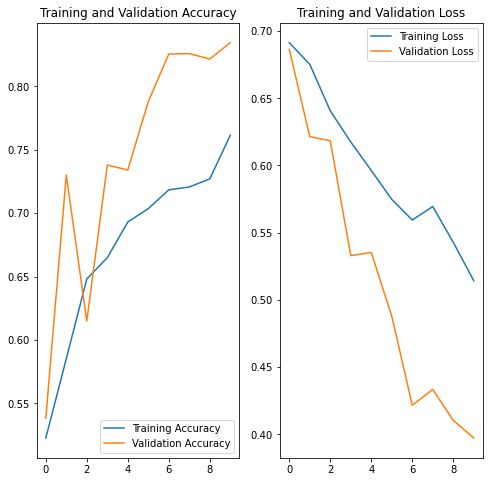

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
# #evaluate the model


scores = model.evaluate_generator(test_data_gen)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.

accuracy: 83.80%


In [19]:
pred = model.predict(test_data_gen)
pred

array([[0.0552031],
       [0.7502148],
       [0.5220049],
       ...,
       [0.9159162],
       [0.796714 ],
       [0.7122917]], dtype=float32)

In [20]:
pred = pred.reshape(1,pred.shape[0])
predicted_class_indices= np.round_(pred)

In [21]:
labels = (validation_data_gen.class_indices)
print(predicted_class_indices)
print (labels)

[[0. 1. 1. ... 1. 1. 1.]]
{'female': 0, 'male': 1}


In [22]:
true_labels = []
perdict_labels = predicted_class_indices[0]

for i in range(len(glob.glob(val_dir_female +'/*'))):
    true_labels.append(0)
for i in range(len(glob.glob(val_dir_male +'/*'))):
    true_labels.append(1)

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


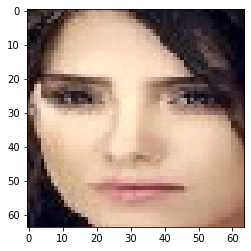

True Label female - Perdict Label : male
{'female': 0, 'male': 1}


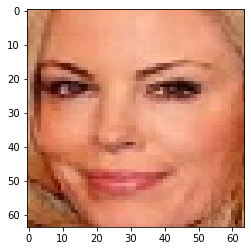

True Label female - Perdict Label : male
{'female': 0, 'male': 1}


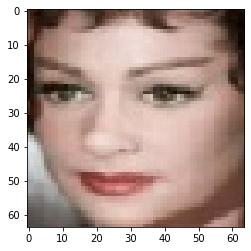

True Label female - Perdict Label : male
{'female': 0, 'male': 1}


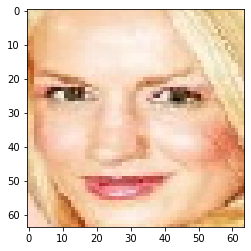

True Label female - Perdict Label : male
{'female': 0, 'male': 1}


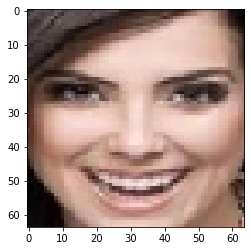

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


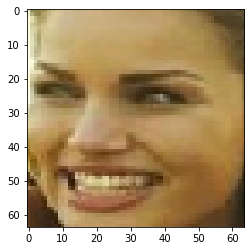

True Label female - Perdict Label : male
{'female': 0, 'male': 1}


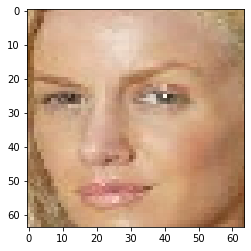

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


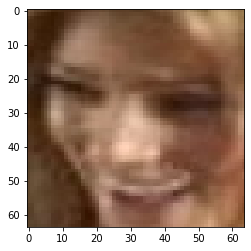

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


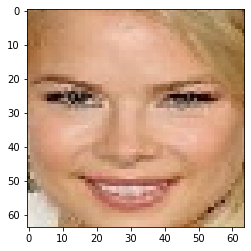

True Label female - Perdict Label : male
{'female': 0, 'male': 1}


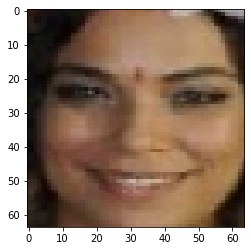

In [24]:
paths = glob.glob(val_dir_female +'/*')
for i in range(0,10):
    test_image = image.load_img(paths[i], target_size = (64, 64))
    plt.imshow(test_image)
    if predicted_class_indices[0][i] == 0:
        pred_label = 'female'
    else:
        pred_label = 'male'
    
    print('True Label female - Perdict Label : {}'.format(pred_label))
    labels = (training_data_gen.class_indices)
    print (labels)
    plt.show()

True Label male - Perdict Label : male
{'female': 0, 'male': 1}


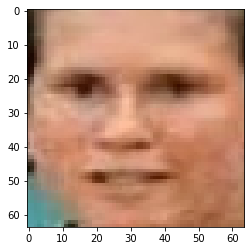

True Label male - Perdict Label : female
{'female': 0, 'male': 1}


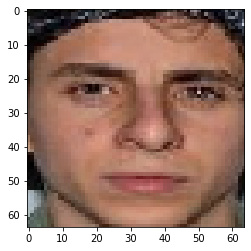

True Label male - Perdict Label : male
{'female': 0, 'male': 1}


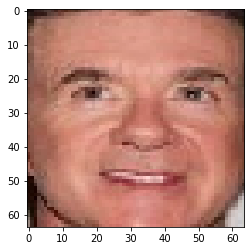

True Label male - Perdict Label : female
{'female': 0, 'male': 1}


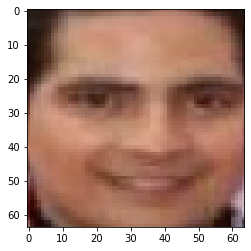

True Label male - Perdict Label : male
{'female': 0, 'male': 1}


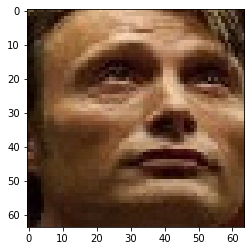

True Label male - Perdict Label : female
{'female': 0, 'male': 1}


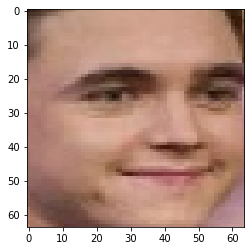

True Label male - Perdict Label : female
{'female': 0, 'male': 1}


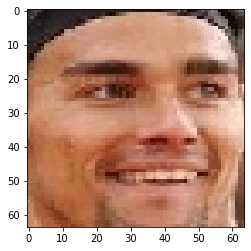

True Label male - Perdict Label : male
{'female': 0, 'male': 1}


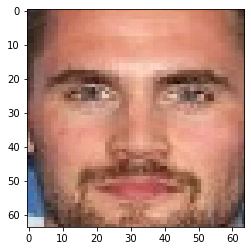

True Label male - Perdict Label : female
{'female': 0, 'male': 1}


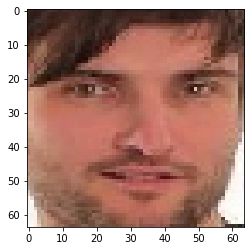

True Label male - Perdict Label : female
{'female': 0, 'male': 1}


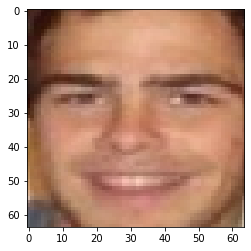

In [25]:
paths = glob.glob(val_dir_male +'/*')
l = len(glob.glob(val_dir_female +'/*'))
for i in range(0,10):
    test_image = image.load_img(paths[i], target_size = (64, 64))
    plt.imshow(test_image)
    if predicted_class_indices[0][l+i] == 0:
        pred_label = 'female'
    else:
        pred_label = 'male'
    
    print('True Label male - Perdict Label : {}'.format(pred_label))
    labels = (training_data_gen.class_indices)
    print (labels)
    plt.show()

In [ ]:
# model1 = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),

#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),

#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(2, activation = 'softmax')
# ])

In [ ]:
# model1.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [ ]:
# epochs = 10

# history = model1.fit_generator(
#     training_data_gen,
#     steps_per_epoch = 40,
#     epochs=epochs,
#     validation_data=validation_data_gen,
#     validation_steps = 40
# )